In [257]:
import pandas as pd
from pandas_profiling import ProfileReport
import plotly
import seaborn as sns
import matplotlib.pyplot as plt

In [258]:
transactions=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='Transactions')

In [259]:
customerDemo=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='CustomerDemographic')

In [260]:
cust = pd.merge(transactions, customerDemo, how="inner", on=["customer_id", "customer_id"])

In [261]:
cust

transaction_id  product_id  customer_id transaction_date  online_order  \
0                   1           2         2950       2017-02-25           0.0   
1               11065           1         2950       2017-10-16           0.0   
2               18923          62         2950       2017-04-26           0.0   
3                   2           3         3120       2017-05-21           1.0   
4                6862           4         3120       2017-10-05           0.0   
...               ...         ...          ...              ...           ...   
19992           19854          68          130       2017-02-02           1.0   
19993           17966          17         2789       2017-12-06           0.0   
19994           18462          80         2789       2017-06-20           0.0   
19995           17981          69         3446       2017-12-26           1.0   
19996           18165          86         3446       2017-12-03           0.0   

      order_status           brand product_line product_class product_size  \
0         Approved           Solex     Standard        medium       medium   
1         Approved  Giant Bicycles     Standard        medium       medium   
2         Approved           Solex     Standard        medium       medium   
3         Approved   Trek Bicycles     Standard        medium        large   
4         Approved  Giant Bicycles     Standard          high       medium   
...            ...             ...          ...           ...          ...   
19992     Approved      OHM Cycles     Standard        medium       medium   
19993     Approved           Solex     Standard          high       medium   
19994     Approved      OHM Cycles      Touring           low       medium   
19995     Approved  Giant Bicycles         Road        medium       medium   
19996     Approved      OHM Cycles     Standard        medium       medium   

       ...  gender  past_3_years_bike_related_purchases        DOB   age  \
0      ...    Male                                   19 1955-01-11  68.0   
1      ...    Male                                   19 1955-01-11  68.0   
2      ...    Male                                   19 1955-01-11  68.0   
3      ...  Female                                   89 1979-02-04  44.0   
4      ...  Female                                   89 1979-02-04  44.0   
...    ...     ...                                  ...        ...   ...   
19992  ...    Male                                   32 1997-07-18  25.0   
19993  ...  Female                                   66 1992-11-30  30.0   
19994  ...  Female                                   66 1992-11-30  30.0   
19995  ...    Male                                    8 1967-01-30  56.0   
19996  ...    Male                                    8 1967-01-30  56.0   

                 job_title job_industry_category     wealth_segment  \
0      Software Engineer I    Financial Services      Mass Customer   
1      Software Engineer I    Financial Services      Mass Customer   
2      Software Engineer I    Financial Services      Mass Customer   
3      Clinical Specialist                Health      Mass Customer   
4      Clinical Specialist                Health      Mass Customer   
...                    ...                   ...                ...   
19992    Chemical Engineer         Manufacturing      Mass Customer   
19993        Senior Editor    Financial Services  Affluent Customer   
19994        Senior Editor    Financial Services  Affluent Customer   
19995  Structural Engineer         Manufacturing      Mass Customer   
19996  Structural Engineer         Manufacturing      Mass Customer   

      deceased_indicator  owns_car tenure  
0                      N       Yes   10.0  
1                      N       Yes   10.0  
2                      N       Yes   10.0  
3                      N       Yes   10.0  
4                      N       Yes   10.0  
...                  ...       ...    ...  
19992                  

In [262]:
cust=cust.drop(columns=['Unnamed: 13'],axis=1)

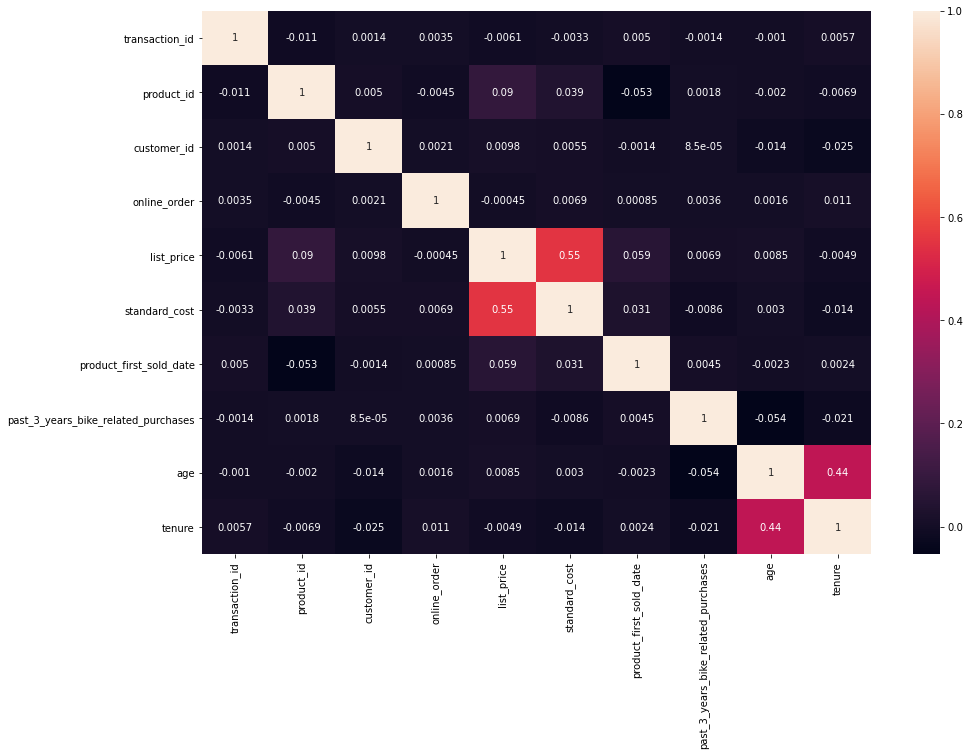

In [263]:
plt.figure(figsize=(15,10))
sns.heatmap(cust.corr(),annot=True)
plt.show()

## Exploratory Data Analysis

The aim is to understand the behavior patterns of the customer so that we can identify how to target different groups of people to ultimately increase sales.

1. Distribution of the number of customers according to age:

<AxesSubplot:>

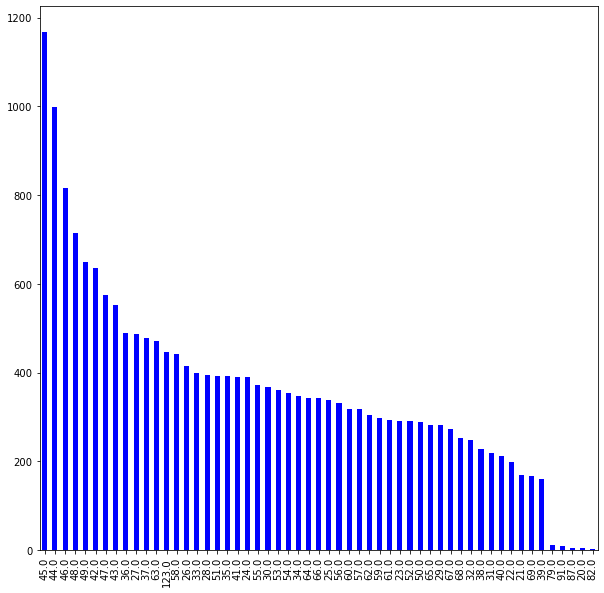

In [264]:
cust[cust['deceased_indicator']=='N']['age'].value_counts().plot(kind='bar', figsize=(10,10), color='blue')

2. Number of customers for each brand

<AxesSubplot:>

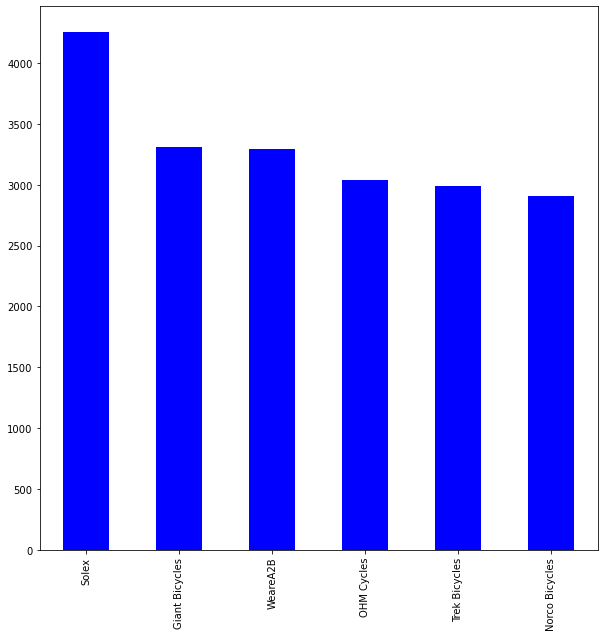

In [265]:
cust['brand'].value_counts().plot(kind='bar', figsize=(10,10), color='blue')

3. Gender distribution - Number of men vs women who bought bike/bike parts

<AxesSubplot:>

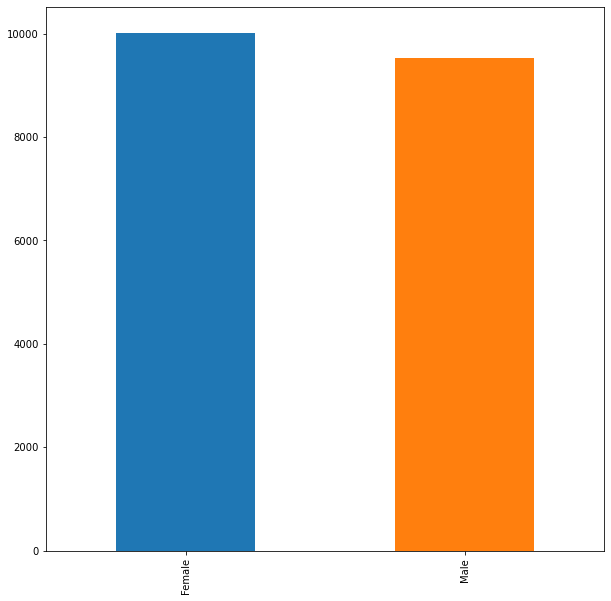

In [266]:
cust[cust['gender']!='U']['gender'].value_counts().plot(x='brand',kind='bar', figsize=(10,10), color=['C0','C1'])

4. Gender vs Brand - Interestingly, more women than men bought bike/and related parts

<AxesSubplot:xlabel='brand,gender'>

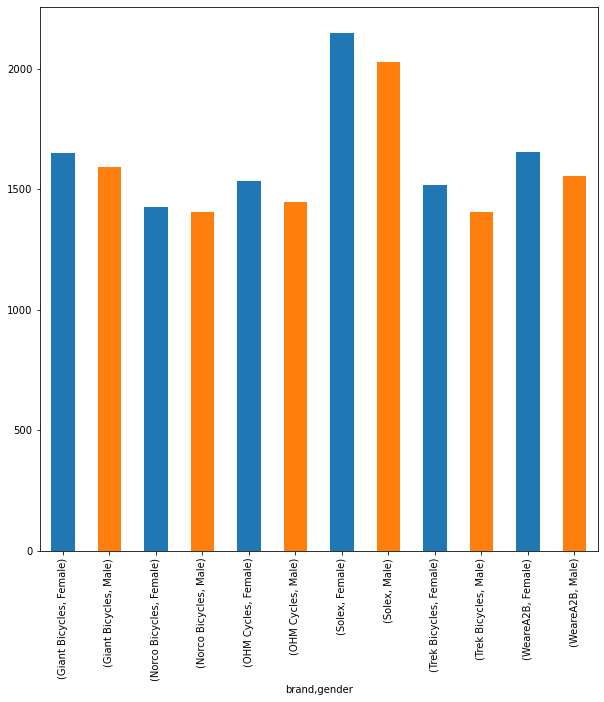

In [267]:
cust[cust['gender']!='U'].groupby('brand')['gender'].value_counts().plot(x='brand',kind='bar', figsize=(10,10), color=['C0','C1'])

5. Product Line vs Gender 

<AxesSubplot:xlabel='product_line,gender'>

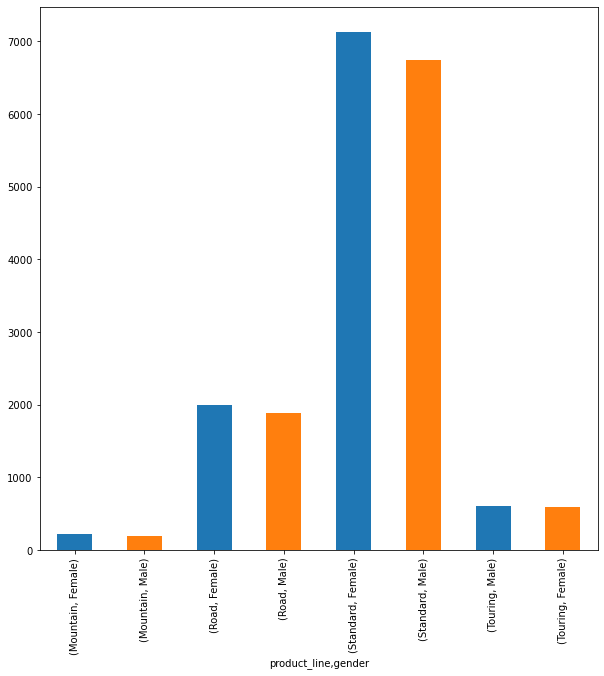

In [268]:
cust[cust['gender']!='U'].groupby('product_line')['gender'].value_counts().plot(x='brand',kind='bar', figsize=(10,10), color=['C0','C1'])

6. Profession vs product_line

In [269]:
cust['profession']=cust['job_title'].str.split(' ').str[0]

In [270]:
cust['product_line'].unique()

array(['Standard', 'Road', 'Touring', 'Mountain', nan], dtype=object)

<AxesSubplot:>

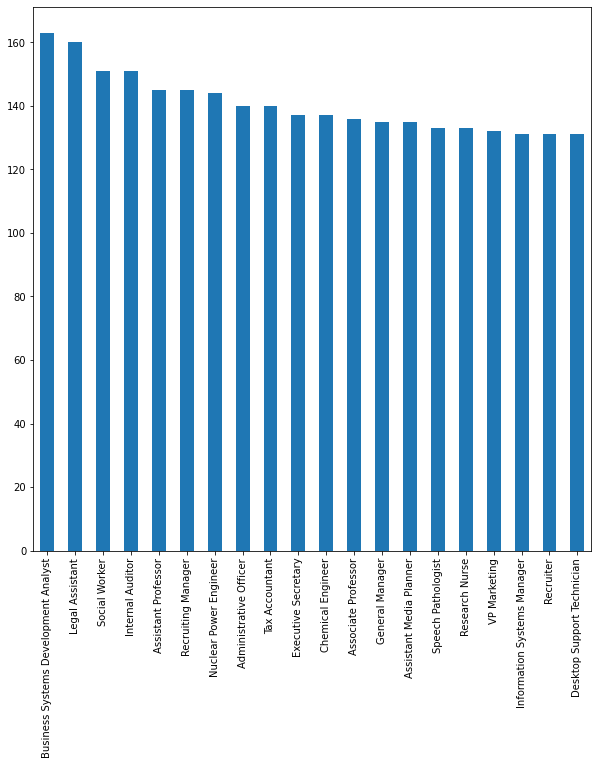

In [271]:
cust[cust['product_line']=='Standard']['job_title'].value_counts()[:20].plot(kind='bar',figsize=(10,10))

<AxesSubplot:>

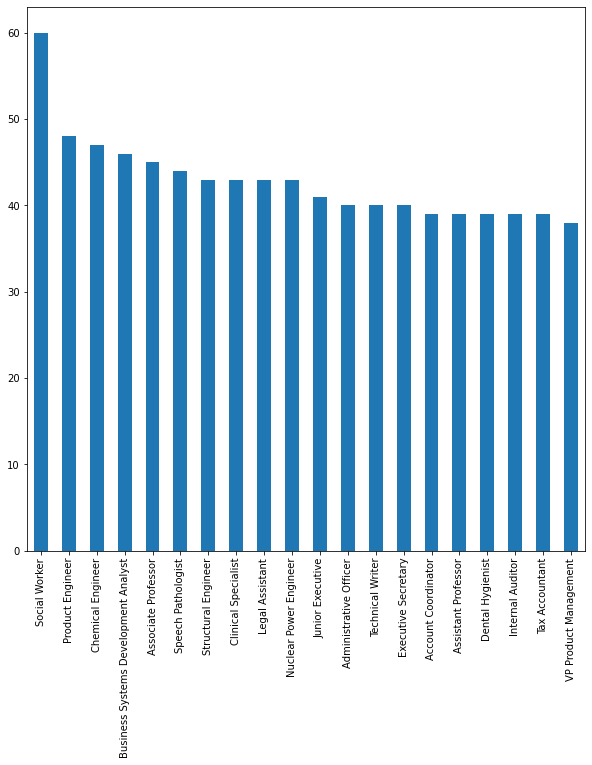

In [272]:
cust[cust['product_line']=='Road']['job_title'].value_counts()[:20].plot(kind='bar',figsize=(10,10))

<AxesSubplot:>

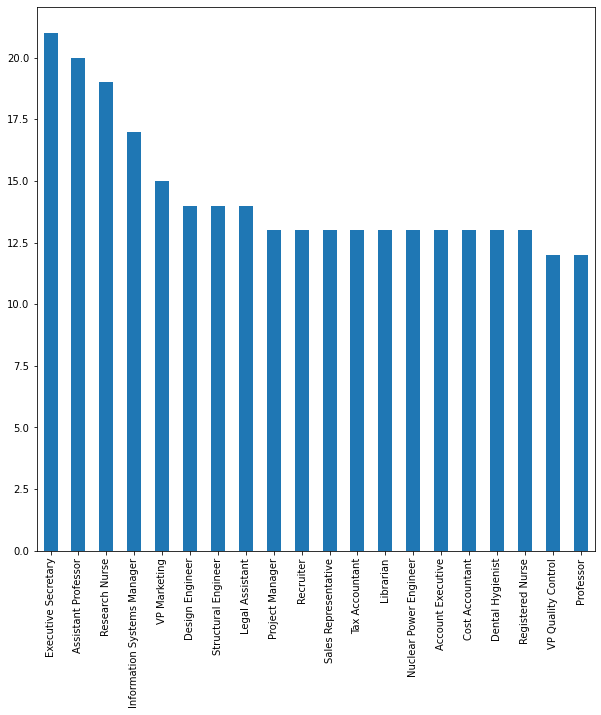

In [273]:
cust[cust['product_line']=='Touring']['job_title'].value_counts()[:20].plot(kind='bar',figsize=(10,10))

<AxesSubplot:>

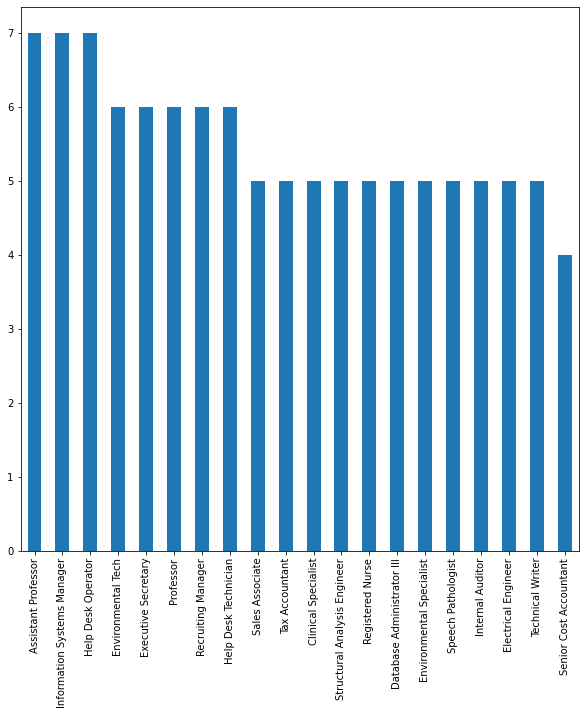

In [274]:
cust[cust['product_line']=='Mountain']['job_title'].value_counts()[:20].plot(kind='bar',figsize=(10,10))

7. Owns car vs Approved

<AxesSubplot:>

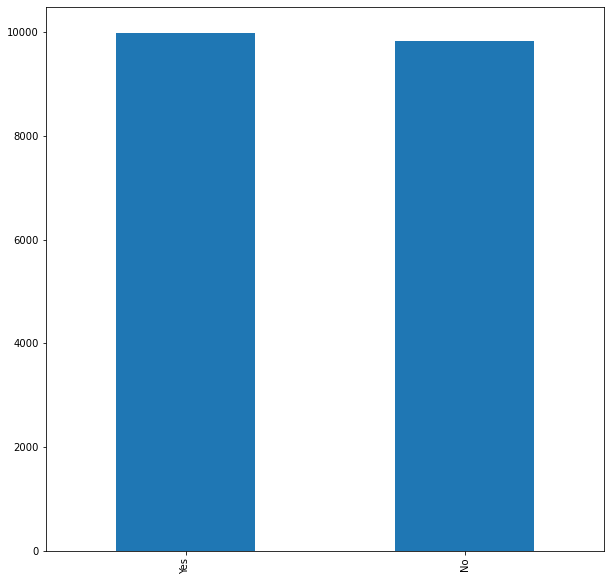

In [275]:
cust[cust['order_status']=='Approved']['owns_car'].value_counts().plot(kind='bar',figsize=(10,10))

8. Transactions per month

In [276]:
cust['month']=cust['transaction_date'].dt.month_name(locale='English')

<AxesSubplot:>

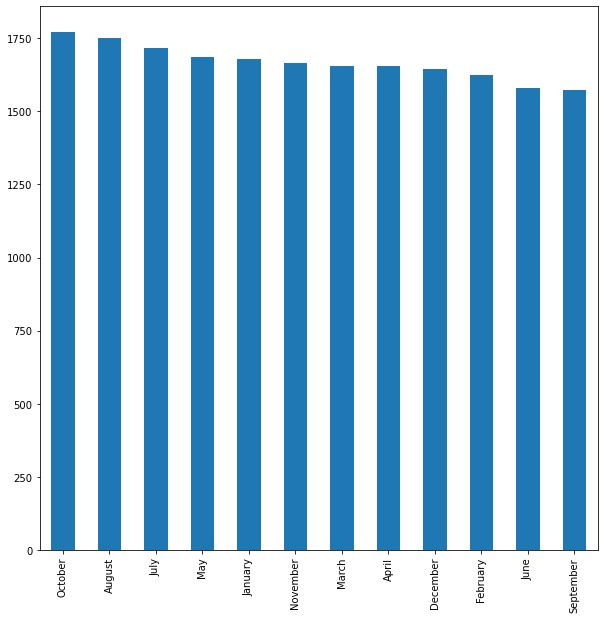

In [277]:
cust['month'].value_counts().plot(kind='bar',figsize=(10,10))

## Data Profiling

In [278]:
profile_cust=ProfileReport(cust,title='Profile Report')

In [279]:
profile_cust

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]